# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [3]:
%%R
install.packages("tidyverse")
require('tidyverse')

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  66



The downloaded binary packages are in
	/var/folders/ht/lsndydln7jl_5ttkmj9tcl7c0000gn/T//RtmpialB5y/downloaded_packages
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.3/tidyverse_2.0.0.tgz'
Content type 'application/x-gzip' length 428470 bytes (418 KB)
downloaded 418 KB

Loading required package: tidyverse
In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <B3716E5A-BF4D-3CA3-B8EB-89643DB72A04> /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


### Read data

In [4]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

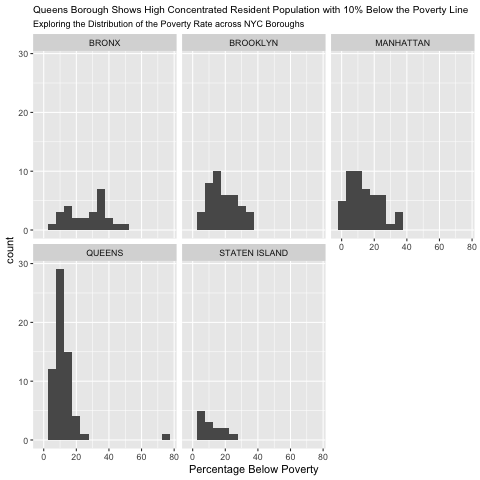

In [28]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram(binwidth=5) +
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Queens Borough Shows High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 10), # Adjust the title size
    plot.subtitle = element_text(size = 9) # Adjust the subtitle size
    )

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

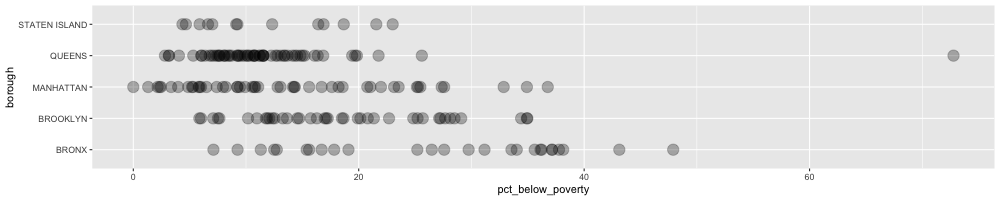

In [53]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_point(alpha=.3, size=5) 

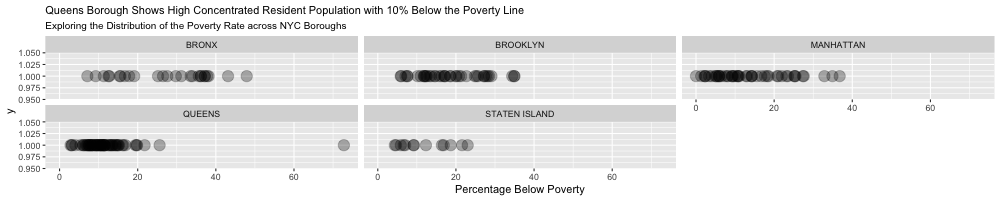

In [29]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(alpha=.3, size=5) +
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Queens Borough Shows High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

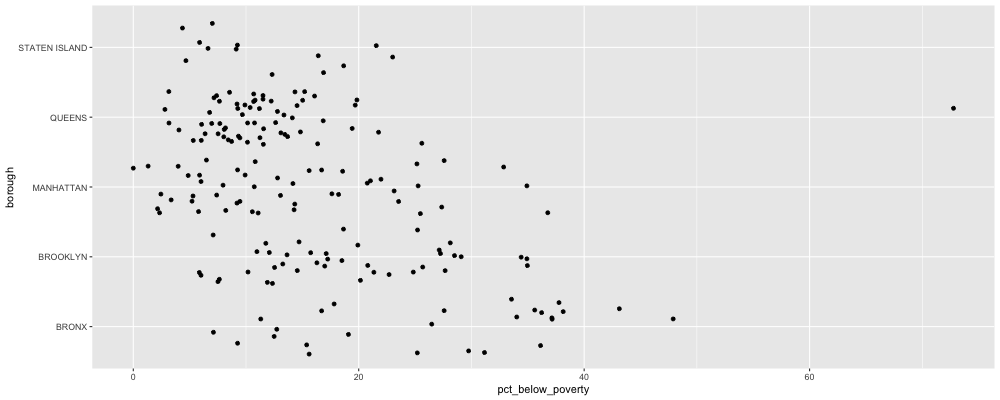

In [58]:
%%R -w 1000 -h 400

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_jitter() 

In [ ]:
# This makes it hard to tell which borough is which.

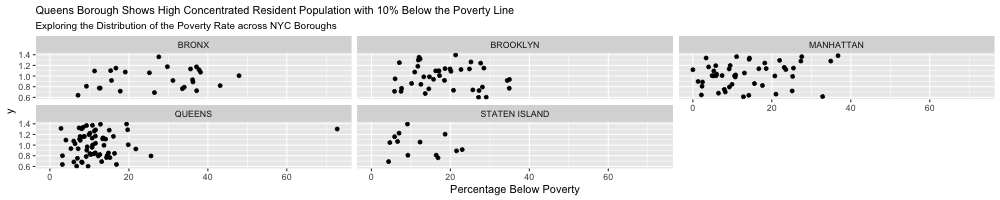

In [30]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter() + 
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Queens Borough Shows High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


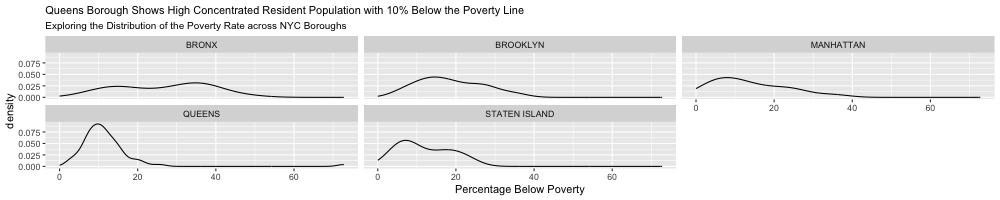

In [31]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density() +
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Queens Borough Shows High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


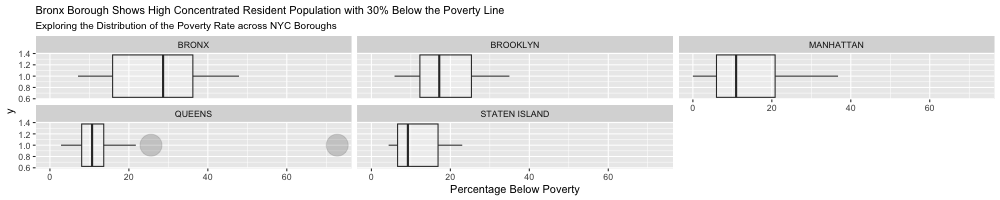

In [35]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Bronx Borough Shows High Concentrated Resident Population with 30% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> write your answer here



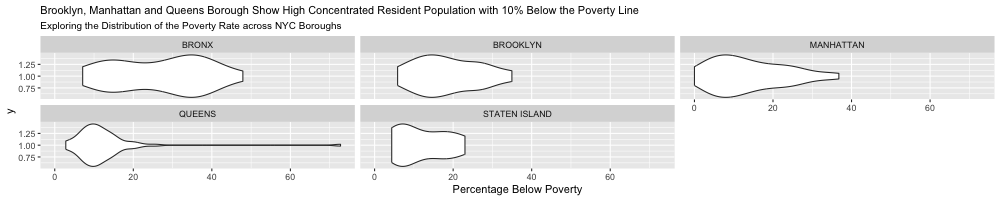

In [34]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() + 
    facet_wrap(~borough) +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Brooklyn, Manhattan and Queens Borough Show High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

In [37]:
%%R
install.packages('ggbeeswarm')
require("ggbeeswarm")


The downloaded binary packages are in
	/var/folders/ht/lsndydln7jl_5ttkmj9tcl7c0000gn/T//RtmpialB5y/downloaded_packages


trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.3/ggbeeswarm_0.7.2.tgz'
Content type 'application/x-gzip' length 1757649 bytes (1.7 MB)
downloaded 1.7 MB

Loading required package: ggbeeswarm


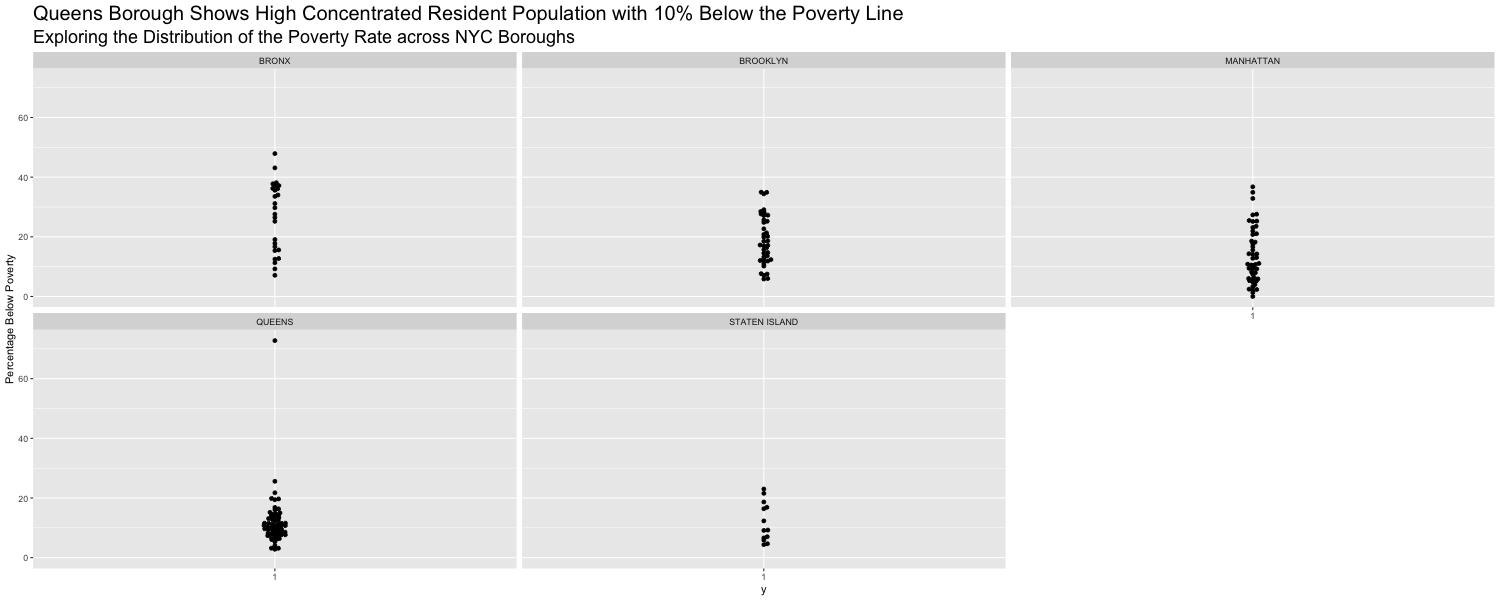

In [52]:
%%R -w 1500 -h 600 # Adjust the canvas size to make the beeswarm graph not that packed

ggplot(df) + 
    aes(x=pct_below_poverty, y="1") +
    facet_wrap(~borough) +
    geom_beeswarm() +
    coord_flip() +
    labs(
    x = 'Percentage Below Poverty',
    title = 'Queens Borough Shows High Concentrated Resident Population with 10% Below the Poverty Line',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 20), # Adjust the title size
    plot.subtitle = element_text(size = 18) # Adjust the subtitle size
    )